In [1]:
import numpy as np
import pandas as pd
from collections import deque
import matplotlib.pyplot as plt

In [2]:
from run import run_simulation
from utils.plot import plot_simulation

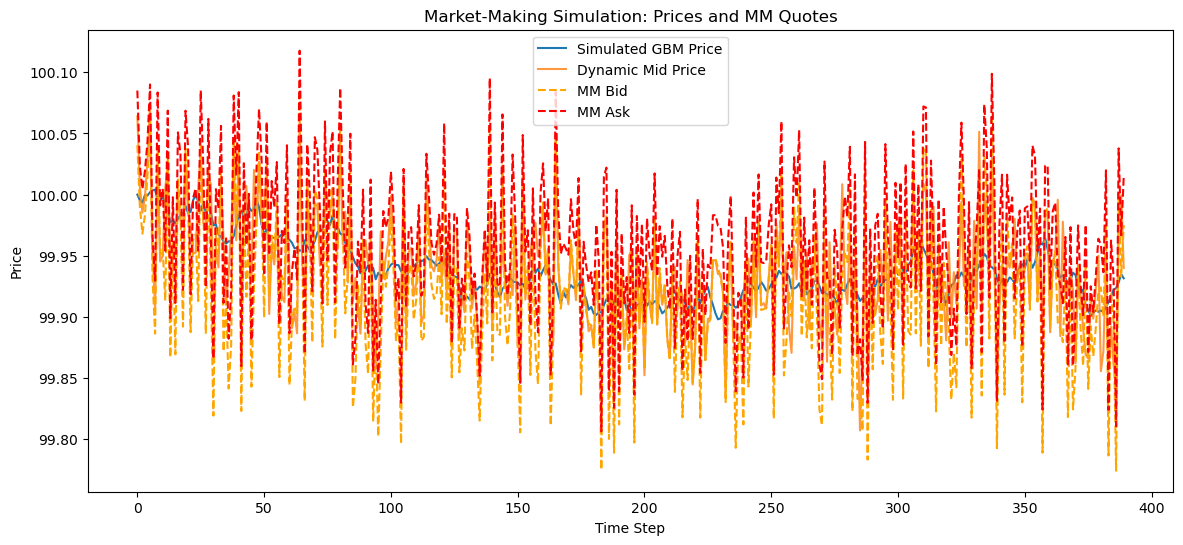

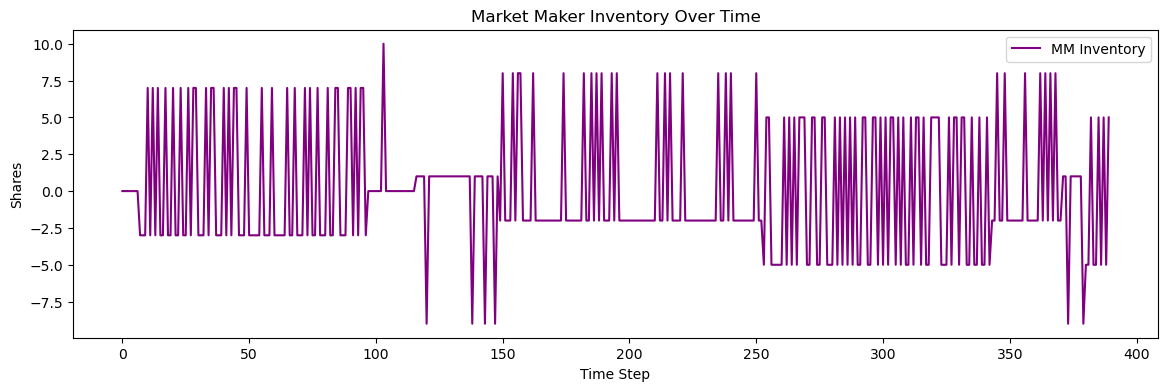

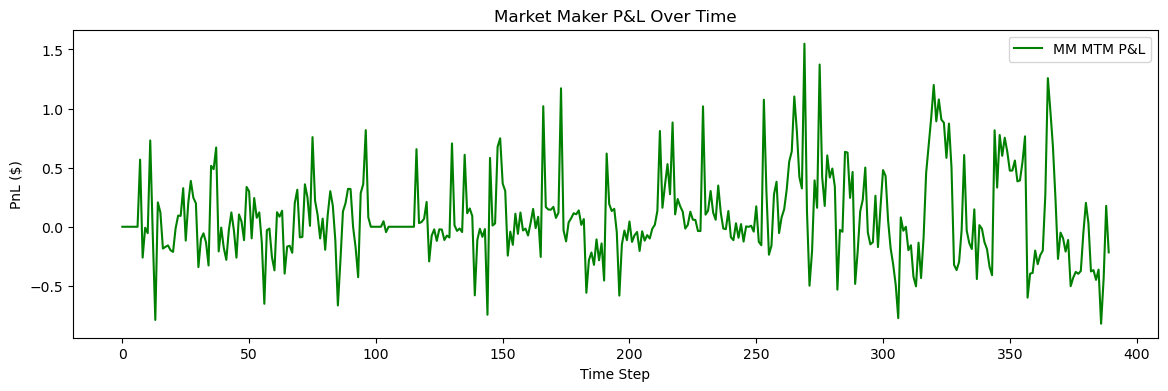

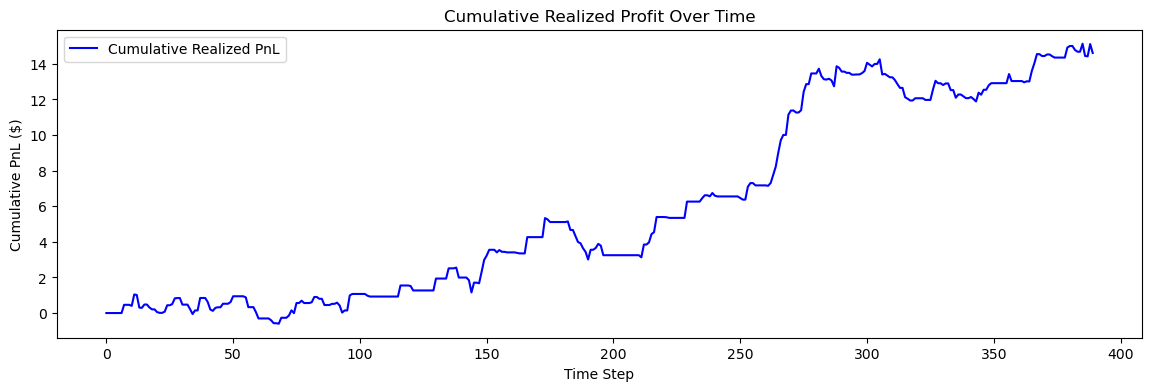

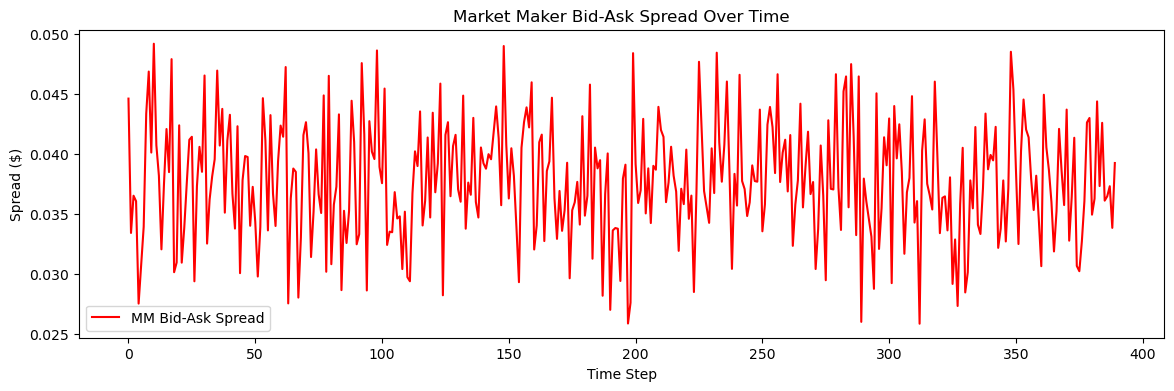

In [3]:
df_simple = run_simulation(T=390, S0=100, trade_qty=10, spread=0.03, cost_per_share=0.01, use_avellaneda=False)

plot_simulation(df_simple)
